# 문제1. 1주차 예상 문제 1  

데이터 출처 : https://data.kma.go.kr/cmmn/static/staticPage.do?page=intro  
데이터 설명 : 2020년도 이화동(서울) , 수영동(부산)의 시간단위의 기온과 강수량  
데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/weather/weather2.csv  
데이터 상위 5개 컬럼  
  
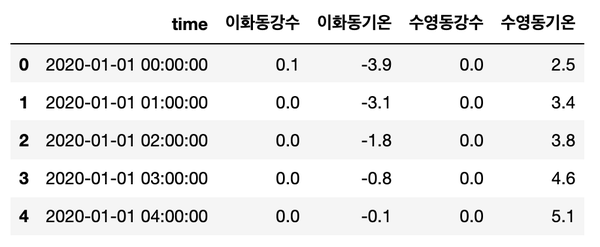

## import

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/weather/weather2.csv')
df

,time,이화동강수,이화동기온,수영동강수,수영동기온
0,2020-01-01 00:00:00,0.1,-3.9,0.0,2.5
1,2020-01-01 01:00:00,0.0,-3.1,0.0,3.4
2,2020-01-01 02:00:00,0.0,-1.8,0.0,3.8
3,2020-01-01 03:00:00,0.0,-0.8,0.0,4.6
4,2020-01-01 04:00:00,0.0,-0.1,0.0,5.1
...,...,...,...,...,...
8779,2020-12-31 19:00:00,0.0,-9.5,0.0,-4.5
8780,2020-12-31 20:00:00,0.0,-9.5,0.0,-5.0
8781,2020-12-31 21:00:00,0.0,-9.3,0.0,-6.5
8782,2020-12-31 22:00:00,0.0,-9.2,0.0,-4.6


## Q1. 여름철(6월,7월,8월) 이화동이 수영동보다 높은 기온을 가진 시간대는 몇개인가?

In [2]:
# 풀이
df2 = df.copy()
df2.loc[pd.to_datetime(df2.time).dt.month.isin([6,7,8])].loc[df2['이화동기온'] > df2['수영동기온']].reset_index(drop=True).count()

time     1415
이화동강수    1415
이화동기온    1415
수영동강수    1415
수영동기온    1415
dtype: int64

In [3]:
# 해설
# 답안 : 1415개

## 데이터프레임 시간(datetime) 으로 변환
df.time = pd.to_datetime(df.time)

## 시간 정보에서 월 정보 추출
df.time.dt.month

## 특정 월에 속하는 것만 뽑아오기 (두 방법 중 하나)
df[df.time.dt.month.isin([6, 7, 8])]
df.loc[df.time.dt.month.isin([6, 7, 8])]

## index 를 reset하기
### drop = False : 원래 인덱스가 새로운 칼럼으로 들어가고, 리셋된 인덱스가 인덱스가 됨
### drop = True : 인덱스 리셋만 되며, 원래 인덱스는 삭제됨
df.loc[df.time.dt.month.isin([6, 7, 8])].reset_index(drop=True)

## 조건부 (기온 비교)
### df[조건] 과 같은 식도 사용이 가능하지만
### df.loc[조건] 의 방식을 익혀두는 게 좋다.
df[df.time.dt.month.isin([6,7,8])].loc[df['이화동기온'] > df['수영동기온']]



,time,이화동강수,이화동기온,수영동강수,수영동기온
3658,2020-06-01 10:00:00,0.0,19.400000,0.0,19.000000
3679,2020-06-02 07:00:00,0.0,21.000000,0.0,19.900000
3681,2020-06-02 09:00:00,0.0,20.200001,0.0,19.500000
3682,2020-06-02 10:00:00,0.0,19.799999,0.0,19.100000
3683,2020-06-02 11:00:00,0.0,19.600000,0.0,19.500000
...,...,...,...,...,...
5847,2020-08-31 15:00:00,0.0,25.799999,0.0,23.900000
5848,2020-08-31 16:00:00,0.0,25.299999,0.0,23.500000
5849,2020-08-31 17:00:00,0.0,24.700001,0.0,23.600000
5850,2020-08-31 18:00:00,0.0,24.400000,0.0,23.799999


## Q2. 이화동과 수영동의 최대강수량의 시간대를 각각 구하여라

In [4]:
# 풀이
import pandas as pd

df3 = df.copy()
df3.time = pd.to_datetime(df3.time)

df3_leehwa = df3.copy().sort_values(by='이화동강수', ascending=False).reset_index(drop=True)
df3_sooyoung = df3.copy().sort_values(by='수영동강수', ascending=False).reset_index(drop=True)

answer = [df3_leehwa.time[0], df3_sooyoung.time[0]]
answer


# 답
# Timestamp('2020-09-30 09:00:00'), Timestamp('2020-07-23 12:00:00')


[Timestamp('2020-09-30 09:00:00'), Timestamp('2020-07-23 12:00:00')]

In [5]:
# 답안
# 이화동
df.loc[df['이화동강수']==df['이화동강수'].max()].time.values

##2020-09-30T09:00:00

#수영동
df.loc[df['수영동강수']==df['수영동강수'].max()].time.values
##2020-07-23T12:00:00



# 해설
## 특정 셀에서 최댓값 구하기
df['이화동강수'].max()

## 칼럼 중 최댓값과 같은 칼럼 추출
df.loc[df['이화동강수'] == df['이화동강수'].max()]

## 해당 데이터프레임에서 시간값 빼오기
df.loc[df['이화동강수'] == df['이화동강수'].max()].time.values



array(['2020-09-30T09:00:00.000000000'], dtype='datetime64[ns]')